In [1]:
import os
import numpy as np
import re
import pickle
import sys
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import datetime 
from mpl_toolkits.axes_grid1 import make_axes_locatable

sys.path.insert(1, '../')
from SeasonalPlot_Functions import *

In [2]:
home_dir = '/nfs/a319/gy17m2a/PhD/'
home_dir2 = '/nfs/a161/gy17m2a/PhD/'

In [3]:
tbo_vals = pd.read_csv(home_dir + 'datadir/RainGauge/interarrival_thresholds_CDD_noMissing.txt')
tbo_vals = tbo_vals[tbo_vals['Lon']!=-999.0]
tbo_vals['gauge_num'] = tbo_vals.index

In [4]:
quintile_mapping = {1: 'F2', 2: 'F1', 3: 'C', 4: 'B1', 5: 'B2'}
quintile_mapping_thirds = {1: 'F', 2: 'C', 3: 'B'}
areas = ['NW', 'NE', 'ME', 'SE', 'SW']

In [5]:
# ems_present = ['bc005', 'bc006', 'bc007', 'bc009', 'bc010', 'bc011', 'bc012', 'bc013', 'bc015', 'bc016', 'bc017', 'bc018']
# ems_future = ['bb189','bb192', 'bb195', 'bb198', 'bb201', 'bb204','bb208' ,'bb211','bb216', 'bb219','bb222','bb225']

### Load and prepare data

In [6]:
df_long=pd.read_csv(home_dir + f"ProcessedData/AMAX_Events/UKCP18_30mins/all_events_characteristics_new.csv")
present=df_long[df_long['Climate']=='Present']
future=df_long[df_long['Climate']=='Future']
nimrod = pd.read_csv(home_dir + f"ProcessedData/AMAX_Events/NIMROD_30mins/all_events_characteristics.csv")

In [ ]:
# future=future[future['em']!='bb189']
# df_long = df_long[df_long['em'].isin(['bb222', 'bc005'])]

## Compare seasonal distribution for different durations AND between present and future

This is using the durations which we extracted annual maxima for

### Create versions containing just data for particular duration bins

#### This is using the actual lengths of events

Shows that:

Overall: in the future there are less events in summer and more in winter

Breaking down by durations:
- Short duration events (<4hr): in the future there are more in Autumn of Sept, Oct and less in summer months of June, July
- Mid duration events (4-12hr): in the future there are more in Oct, Nov, Dec and less in summer months of Jun, Jul, Aug
- Long duration events (>12hr): in the future there are more in Nov-Jan and less in months of Jun-Sept

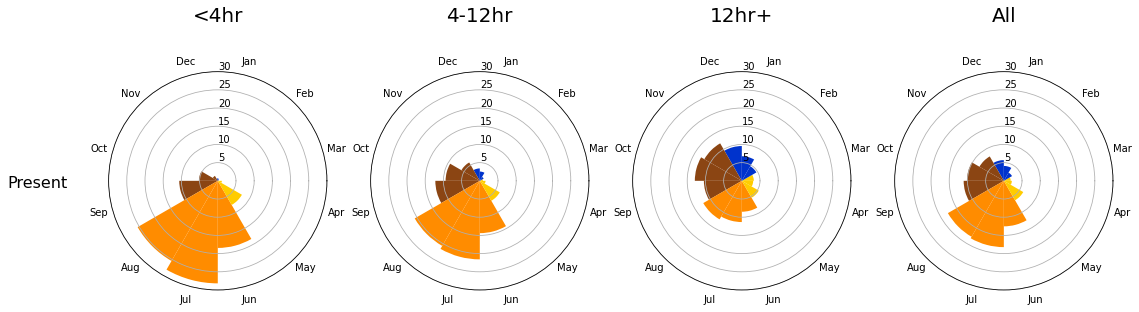

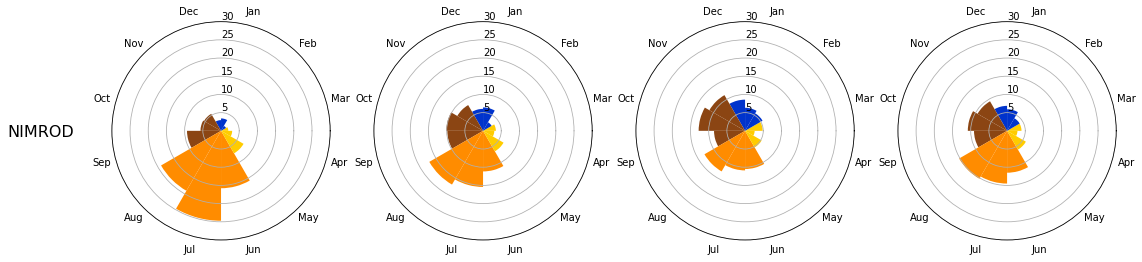

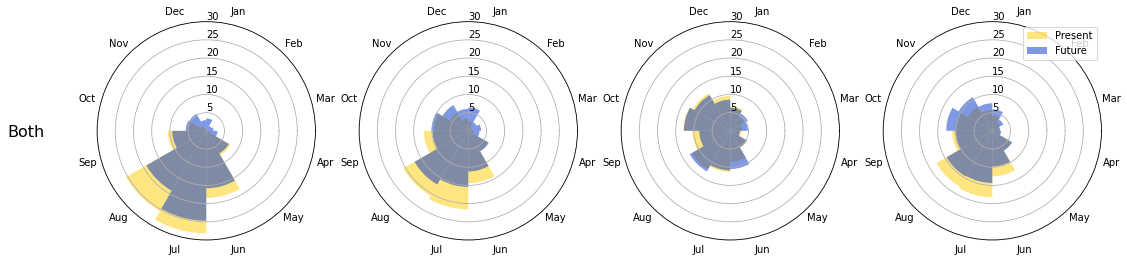

In [35]:
# List of durations and corresponding subplot titles
durations = ['<4hr', '4-12hr', '12hr+']
titles = ["<4hr",  "4-12hr", "12hr+"]

##########################################################
## present
##########################################################
fig, axes = plt.subplots(1,4, figsize=(18, 10), subplot_kw={'polar': True})
fig.subplots_adjust(hspace=0.5)

# Loop through durations, axes, and titles
for ax, duration, title in zip(axes, durations, titles):
    this_duration = present[present['DurationRange_simple'] == duration]
    plot_polar_months_plot(this_duration, ax, True, title, 30, name_variable_to_plot='Percentage')
plot_polar_months_plot(present, axes[3], True, "All",30, name_variable_to_plot = 'Percentage')   
fig.text(0.07, 0.5, 'Present', va='center', ha='center', fontsize=16, rotation='horizontal')

##########################################################
## future
##########################################################
fig, axes = plt.subplots(1,4, figsize=(18, 10), subplot_kw={'polar': True})
fig.subplots_adjust(hspace=0.5)

# Loop through durations, axes, and titles
for ax, duration, title in zip(axes, durations, titles):
    this_duration = nimrod[nimrod['DurationRange_simple'] == duration]
    plot_polar_months_plot(this_duration, ax, False, title, 30, name_variable_to_plot='Percentage')
plot_polar_months_plot(nimrod, axes[3], False, "All",30, name_variable_to_plot = 'Percentage')   
fig.text(0.07, 0.50, 'NIMROD', va='center', ha='center', fontsize=16, rotation='horizontal')

##########################################################
## Present and future
##########################################################
fig, axes = plt.subplots(1,4, figsize=(18, 10), subplot_kw={'polar': True})
fig.subplots_adjust(hspace=0.5)

# Loop through durations, axes, and titles
for ax, duration, title in zip(axes, durations, titles):
    this_duration_pres = present[present['DurationRange_simple'] == duration]
    this_duration_future = nimrod[nimrod['DurationRange_simple'] == duration]
    plot_polar_months_plot_overlay(this_duration_pres, this_duration_future, ax, False, 'All', False, 30) 
plot_polar_months_plot_overlay(present, future, axes[3], False, 'All', True, 30) 
fig.text(0.07, 0.50, 'Both', va='center', ha='center', fontsize=16, rotation='horizontal');  

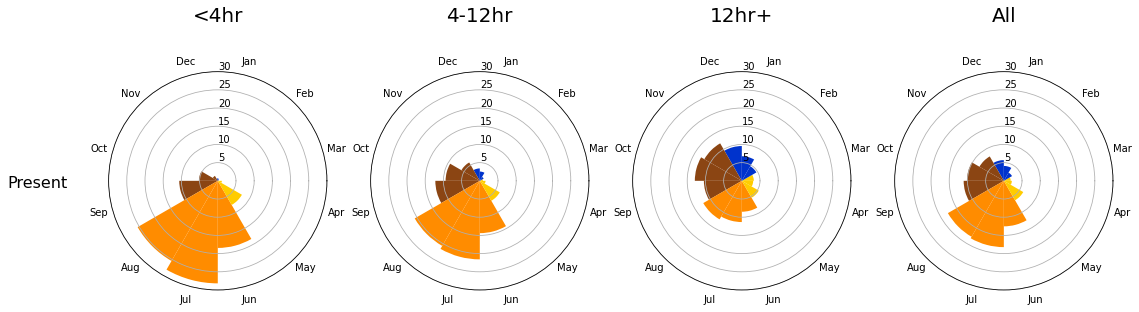

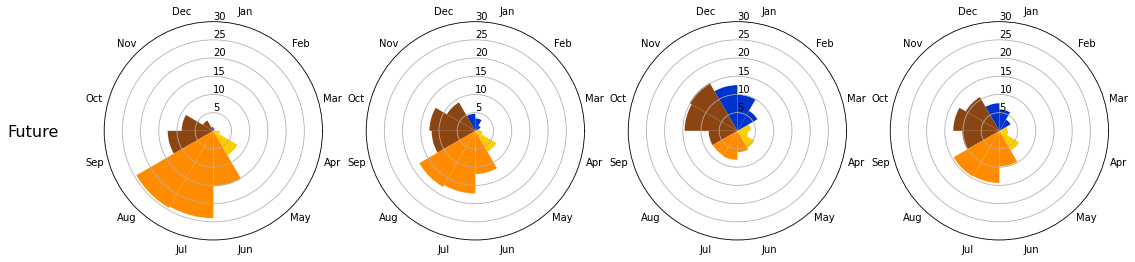

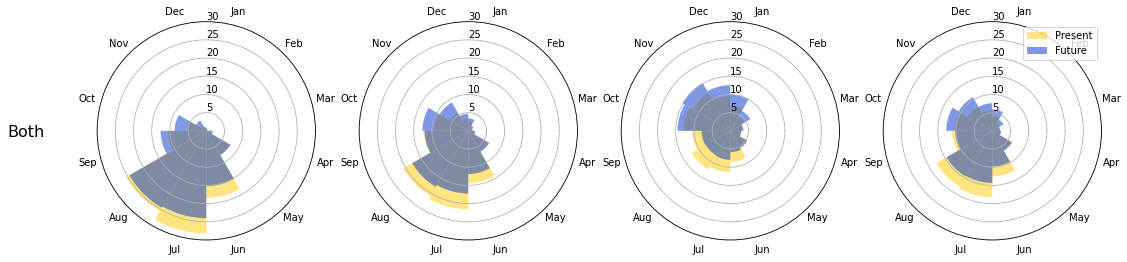

In [33]:
# List of durations and corresponding subplot titles
durations = ['<4hr', '4-12hr', '12hr+']
titles = ["<4hr",  "4-12hr", "12hr+"]

##########################################################
## present
##########################################################
fig, axes = plt.subplots(1,4, figsize=(18, 10), subplot_kw={'polar': True})
fig.subplots_adjust(hspace=0.5)

# Loop through durations, axes, and titles
for ax, duration, title in zip(axes, durations, titles):
    this_duration = present[present['DurationRange_simple'] == duration]
    plot_polar_months_plot(this_duration, ax, True, title, 30, name_variable_to_plot='Percentage')
plot_polar_months_plot(present, axes[3], True, "All",30, name_variable_to_plot = 'Percentage')   
fig.text(0.07, 0.5, 'Present', va='center', ha='center', fontsize=16, rotation='horizontal')

##########################################################
## future
##########################################################
fig, axes = plt.subplots(1,4, figsize=(18, 10), subplot_kw={'polar': True})
fig.subplots_adjust(hspace=0.5)

# Loop through durations, axes, and titles
for ax, duration, title in zip(axes, durations, titles):
    this_duration = future[future['DurationRange_simple'] == duration]
    plot_polar_months_plot(this_duration, ax, False, title, 30, name_variable_to_plot='Percentage')
plot_polar_months_plot(future, axes[3], False, "All",30, name_variable_to_plot = 'Percentage')   
fig.text(0.07, 0.50, 'Future', va='center', ha='center', fontsize=16, rotation='horizontal')

##########################################################
## Present and future
##########################################################
fig, axes = plt.subplots(1,4, figsize=(18, 10), subplot_kw={'polar': True})
fig.subplots_adjust(hspace=0.5)

# Loop through durations, axes, and titles
for ax, duration, title in zip(axes, durations, titles):
    this_duration_pres = present[present['DurationRange_simple'] == duration]
    this_duration_future = future[future['DurationRange_simple'] == duration]
    plot_polar_months_plot_overlay(this_duration_pres, this_duration_future, ax, False, 'All', False, 30) 
plot_polar_months_plot_overlay(present, future, axes[3], False, 'All', True, 30) 
fig.text(0.07, 0.50, 'Both', va='center', ha='center', fontsize=16, rotation='horizontal');  

#### This is using the durations which we extracted annual maxima for

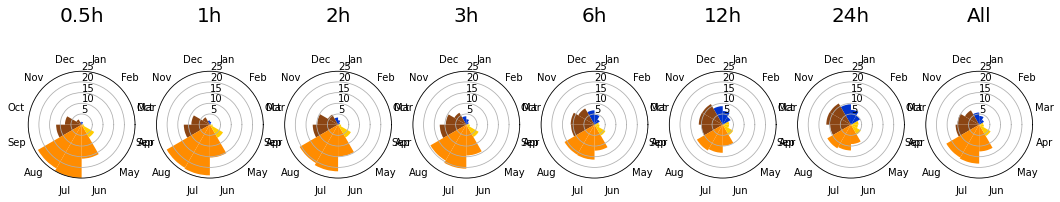

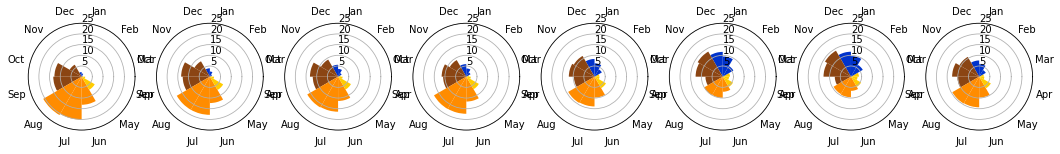

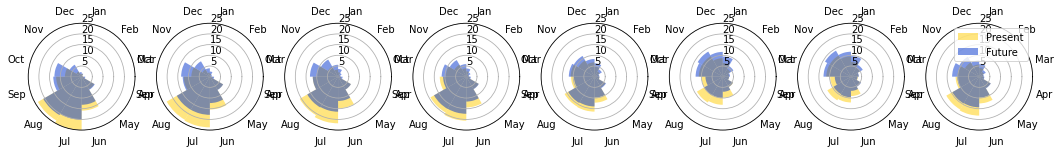

In [17]:
# List of durations and corresponding subplot titles
durations = ['0.5', '1', '2', '3', '6',"12", '24']
titles = ["0.5h",  "1h", "2h", "3h", "6h", '12h',"24h"]

##########################################################
## present
##########################################################
fig, axes = plt.subplots(1, 8, figsize=(18, 10), subplot_kw={'polar': True})
fig.subplots_adjust(hspace=0.5)

# Loop through durations, axes, and titles
for ax, duration, title in zip(axes, durations, titles):
    this_duration = present[present['dur_for_which_this_is_amax'] == float(duration)]
    plot_polar_months_plot(this_duration, ax, True, title, 25, name_variable_to_plot='Percentage')
plot_polar_months_plot(present, axes[7], True, "All",25, name_variable_to_plot = 'Percentage')    
        
##########################################################
## future
##########################################################
fig, axes = plt.subplots(1, 8, figsize=(18, 10), subplot_kw={'polar': True})
fig.subplots_adjust(hspace=0.5)

for ax, duration, title in zip(axes, durations, titles):
    this_duration = future[future['dur_for_which_this_is_amax'] == float(duration)]
    plot_polar_months_plot(this_duration, ax, False, title, 25, name_variable_to_plot='Percentage')
plot_polar_months_plot(future, axes[7], False, "Present (all)",25, name_variable_to_plot = 'Percentage')    

##########################################################
## present and future pver;aod
##########################################################
fig, axes = plt.subplots(1, 8, figsize=(18, 10), subplot_kw={'polar': True})
fig.subplots_adjust(hspace=0.5)

for ax, duration, title in zip(axes, durations, titles):
    this_duration_pres = present[present['dur_for_which_this_is_amax'] == float(duration)]
    this_duration_future = future[future['dur_for_which_this_is_amax'] == float(duration)]
    plot_polar_months_plot_overlay(this_duration_pres, this_duration_future, ax, False, 'All', False, 25) 
plot_polar_months_plot_overlay(present, future, axes[7], False, 'All', True, 25) 

## Comparing plotting count of events vs percentage of events

In [ ]:
# fig = plt.figure(figsize=(18, 10))
# fig.subplots_adjust(hspace=0.5)
# ax1 = plt.subplot(231, polar=True)
# ax2 = plt.subplot(232, polar=True)
# plot_polar_months_plot(events_props_dict_present, ax1, "UKCP18 Present", 30, name_variable_to_plot = 'Count')
# plot_polar_months_plot(events_props_dict_future, ax2,"UKCP18 Future", 30, name_variable_to_plot = 'Count')

# ax3 = plt.subplot(234, polar=True)
# ax4 = plt.subplot(235, polar=True)
# ax5 = plt.subplot(236, polar=True)
# plot_polar_months_plot(events_props_dict_present, ax3, "UKCP18 Present (% of events)", 18, name_variable_to_plot = 'Percentage')
# plot_polar_months_plot(events_props_dict_future, ax4,"UKCP18 Future (% of events)", 18, name_variable_to_plot = 'Percentage')
# plot_polar_months_plot_overlay(events_props_dict_present, events_props_dict_future, ax5, "Present vs Future (% of events)", 30)

## All events, divided geographically

Shows that:
- For the NE, NW, ME regions events are more concentrated in the summer months
- SE, SW have more events in Autumn
- These patterns are emphasised in the future?

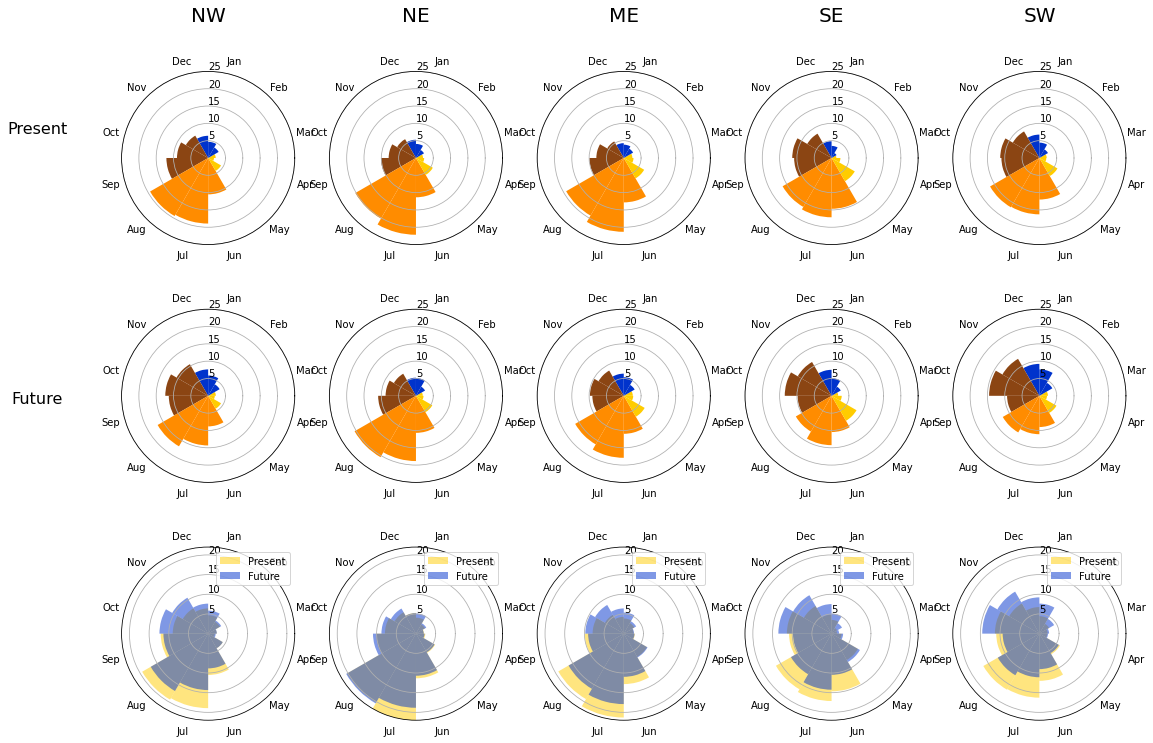

In [18]:
# Create subplots with 2 rows and 5 columns for present and future
fig, axes = plt.subplots(3, 5, figsize=(18, 15), subplot_kw={'polar': True})
fig.subplots_adjust(hspace=-0.3)

# Loop through the areas for both present and future
for i, area in enumerate(areas):
    # Filter for present data
    present_events = present[present['area'] == area]
    
    # Filter for future data
    future_events = future[future['area'] == area]
    
    # Plot for present data (1st row)
    plot_polar_months_plot(present_events, axes[0, i], True, area, 25, name_variable_to_plot='Percentage')
    
    # Plot for future data (2nd row)
    plot_polar_months_plot(future_events, axes[1, i], True, None, 25, name_variable_to_plot='Percentage')
    plot_polar_months_plot_overlay(present_events, future_events, axes[2, i], False, "Present vs Future (% of events)", True, 22)
    
# Add row labels for "Present" and "Future"
fig.text(0.06, 0.75, 'Present', va='center', ha='center', fontsize=16, rotation='horizontal')
fig.text(0.06, 0.50, 'Future', va='center', ha='center', fontsize=16, rotation='horizontal');          

### Plot for each area, divided by durations, for the present

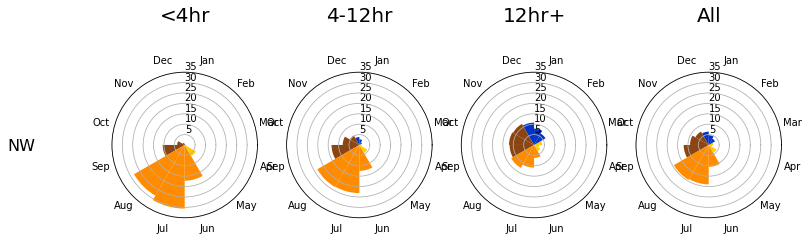

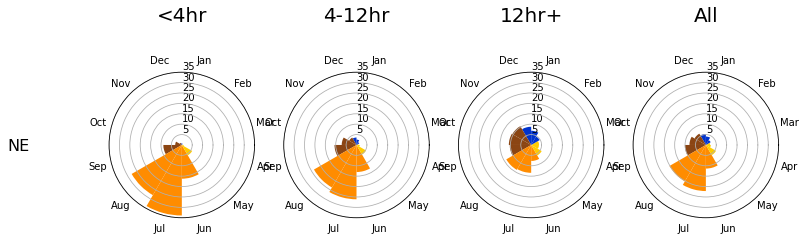

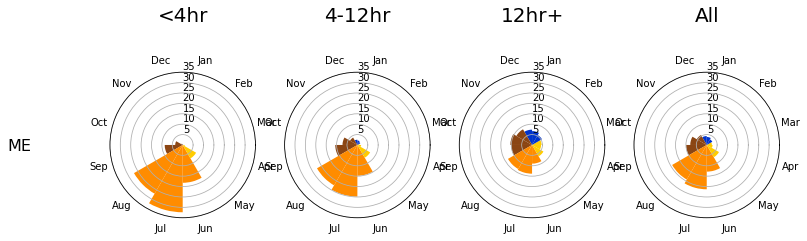

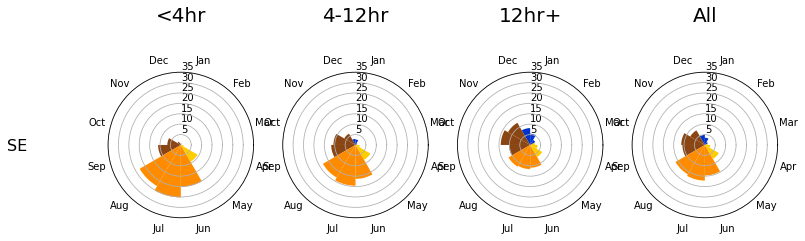

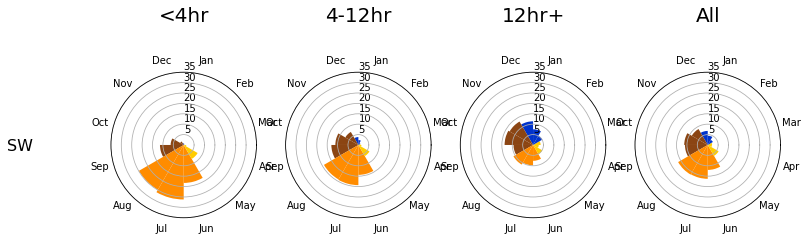

In [19]:
def plot_by_dur_and_area(area_str):
    fig, axes = plt.subplots(1,4, figsize=(12, 6), subplot_kw={'polar': True})
    fig.subplots_adjust(hspace=0.5)
    for ax, duration, title in zip(axes, durations, titles):
        this_duration_pres = present[present['DurationRange_simple'] == duration]
        this_duration_area = this_duration_pres[this_duration_pres['area'] ==area_str]
        this_area = present[present['area'] ==area_str]
        plot_polar_months_plot(this_duration_area, ax, True, duration, rmax, name_variable_to_plot='Percentage')
    plot_polar_months_plot(this_area, axes[3], True, 'All', rmax, name_variable_to_plot='Percentage')    
    fig.text(0.02, 0.5, area_str, va='center', ha='center', fontsize=16, rotation='horizontal');

# List of durations and corresponding subplot titles
durations = ['<4hr', '4-12hr', '12hr+']
titles = ["<4hr",  "4-12hr", "12hr+"]
rmax =35    
    
plot_by_dur_and_area('NW')
plot_by_dur_and_area('NE')
plot_by_dur_and_area('ME')
plot_by_dur_and_area('SE')
plot_by_dur_and_area('SW')

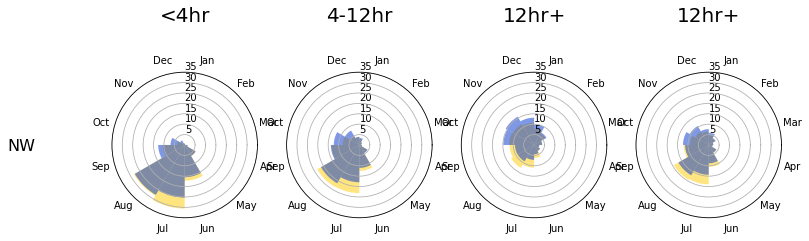

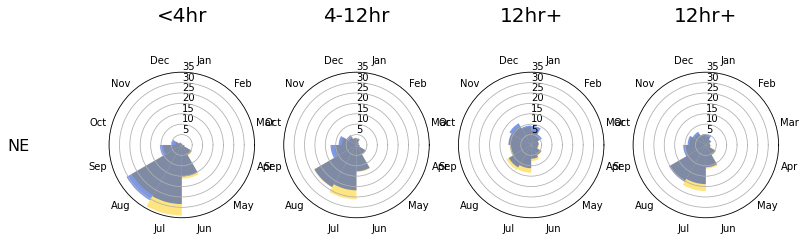

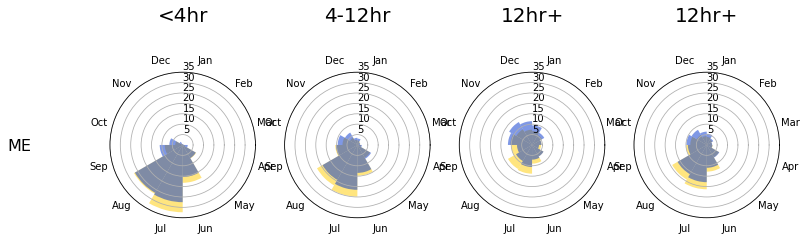

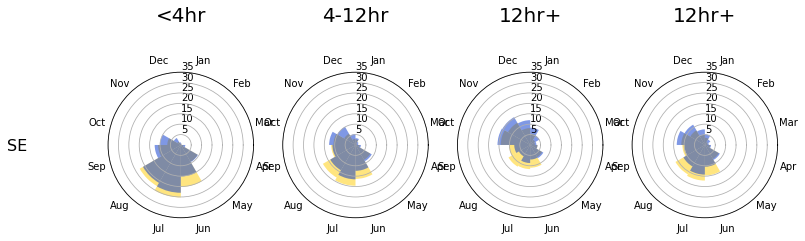

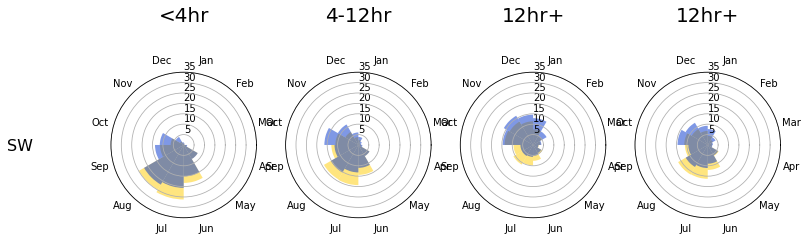

In [20]:
def plot_by_dur_and_area_overlaid(area_str):
   
    fig, axes = plt.subplots(1,4, figsize=(12, 6), subplot_kw={'polar': True})
    fig.subplots_adjust(hspace=0.5)
    for ax, duration, title in zip(axes, durations, titles):
        this_duration_pres = present[present['DurationRange_simple'] == duration]
        this_duration_pres_area = this_duration_pres[this_duration_pres['area'] ==area_str]
        
        this_duration_future = future[future['DurationRange_simple'] == duration]
        this_duration_future_area = this_duration_future[this_duration_future['area'] ==area_str]
        
        ## This area, for all durations
        this_area_pres = present[present['area'] ==area_str]
        this_area_future = future[future['area'] ==area_str]
        
        plot_polar_months_plot_overlay(this_duration_pres_area, this_duration_future_area, ax, True, duration, False, rmax)
    plot_polar_months_plot_overlay(this_area_pres, this_area_future, axes[3], True, duration, False, rmax)
    fig.text(0.02, 0.5, area_str, va='center', ha='center', fontsize=16, rotation='horizontal');

    
# List of durations and corresponding subplot titles
durations = ['<4hr', '4-12hr', '12hr+']
titles = ["<4hr",  "4-12hr", "12hr+"]
rmax =35    
    
plot_by_dur_and_area_overlaid('NW')
plot_by_dur_and_area_overlaid('NE')
plot_by_dur_and_area_overlaid('ME')
plot_by_dur_and_area_overlaid('SE')
plot_by_dur_and_area_overlaid('SW')

## Theta and R2 values 

### Grouped by season, gauge, sampling duration

In [21]:
df_changes_season =pd.read_csv(home_dir + f"ProcessedData/AMAX_Events/UKCP18_30mins/grouped_by_gauge_samplingdur_season_changes.csv")
df_changes=pd.read_csv(home_dir + f"ProcessedData/AMAX_Events/UKCP18_30mins/grouped_by_gauge_samplingdur_changes.csv")

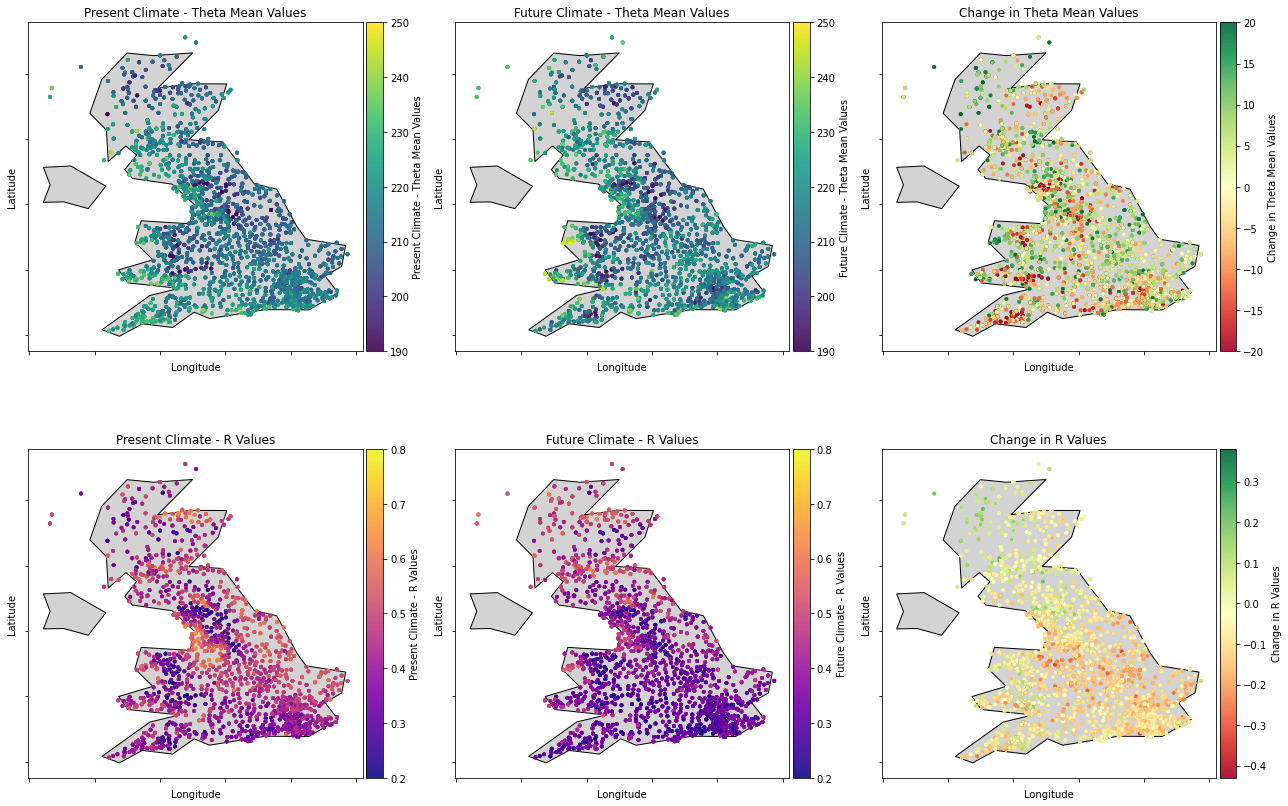

In [27]:
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for Great Britain
gb_outline = gdf[(gdf.name == "United Kingdom")]

# Create a polygon from the geometry of Great Britain for point containment check
gb_polygon = gb_outline.geometry.values[0]

# Create a figure and axes for the six subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Present Climate - Theta Mean
present_theta_data = df_changes[['gauge_num', 'D_mean_present']].copy()
present_theta_data['Climate'] = 'present'  # Add a Climate column for clarity
plot_values_on_map(axes[0, 0], present_theta_data, 'Present Climate - Theta Mean Values', tbo_vals, 'D_mean_present',
                   vmin = 190, vmax = 250 )

# Future Climate - Theta Mean
future_theta_data = df_changes[['gauge_num', 'D_mean_future']].copy()
future_theta_data['Climate'] = 'future'  # Add a Climate column for clarity
plot_values_on_map(axes[0, 1], future_theta_data, 'Future Climate - Theta Mean Values', tbo_vals, 'D_mean_future',
                                      vmin =190, vmax = 250 )

# Change - Theta Mean
change_theta_data = df_changes[['gauge_num', 'D_mean_diff']].copy()
change_theta_data['Climate'] = 'change'  # Add a Climate column for clarity
plot_values_on_map(axes[0, 2], change_theta_data, 'Change in Theta Mean Values', tbo_vals, 'D_mean_diff',
#                     vmin = change_theta_data['D_mean_diff'].min(), vmax = change_theta_data['D_mean_diff'].max(),
                   vmin=-20, vmax=20,
                  cmap = 'RdYlGn')

# Present Climate - R
present_R_data = df_changes[['gauge_num', 'R_present']].copy()
present_R_data['Climate'] = 'present'  # Add a Climate column for clarity
plot_values_on_map(axes[1, 0], present_R_data, 'Present Climate - R Values', tbo_vals, 'R_present', 
                                      vmin =0.2, vmax = 0.8, cmap='plasma')

# Future Climate - R
future_R_data = df_changes[['gauge_num', 'R_future']].copy()
future_R_data['Climate'] = 'future'  # Add a Climate column for clarity
plot_values_on_map(axes[1, 1], future_R_data, 'Future Climate - R Values', tbo_vals, 'R_future',
                   vmin =0.2, vmax = 0.8, cmap='plasma')


# Change - R
change_R_data = df_changes[['gauge_num', 'R_diff']].copy()
change_R_data['Climate'] = 'change'  # Add a Climate column for clarity
plot_values_on_map(axes[1, 2], change_R_data, 'Change in R Values', tbo_vals, 'R_diff', 
                            vmin = change_R_data['R_diff'].min(), vmax = change_R_data['R_diff'].max(),
                  cmap = 'RdYlGn')

# Adjust layout
plt.tight_layout()

In [22]:
df_changes_all=pd.read_csv(home_dir + f"ProcessedData/AMAX_Events/UKCP18_30mins/grouped_by_gauge_samplingdur_changes_allevents.csv")
df_changes_byduration=pd.read_csv(home_dir + f"ProcessedData/AMAX_Events/UKCP18_30mins/grouped_by_gauge_samplingdur_changes_new.csv")

In [12]:
# Function to plot the change in theta_mean for a given duration
def plot_change_variable_for_duration(ax, variable, duration, df_changes, tbo_vals, cmap = 'viridis'):
    # Filter the data for the given duration
    change_R_data = df_changes[df_changes['sampling_duration'] == float(duration)][['gauge_num', variable]]
    
    # Get longitude and latitude from gauge locations
    gauge_locs = change_R_data['gauge_num'].copy()

    # Now index into gauge_locations with the copied values
    lon = tbo_vals.loc[gauge_locs, 'Lon']
    lat = tbo_vals.loc[gauge_locs, 'Lat']
    
    # Plot the background outline of Great Britain
    gb_outline.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=1)
    
    # Scatter plot for theta change
    scatter = ax.scatter(lon, lat, c=change_R_data[variable], cmap=cmap, edgecolor=None, s= 8, alpha=0.9)
    ax.set_title(f'{variable} (Duration: {duration} hours)')
    #ax.set_xlabel('Longitude')
    #ax.set_ylabel('Latitude')
    ax.set_xticklabels([]); ax.set_yticklabels([])
    
    # Create a color bar that is scaled to the size of the plot
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)  # Control the width and padding of the colorbar
    plt.colorbar(scatter, cax=cax, label=f'{variable}')    

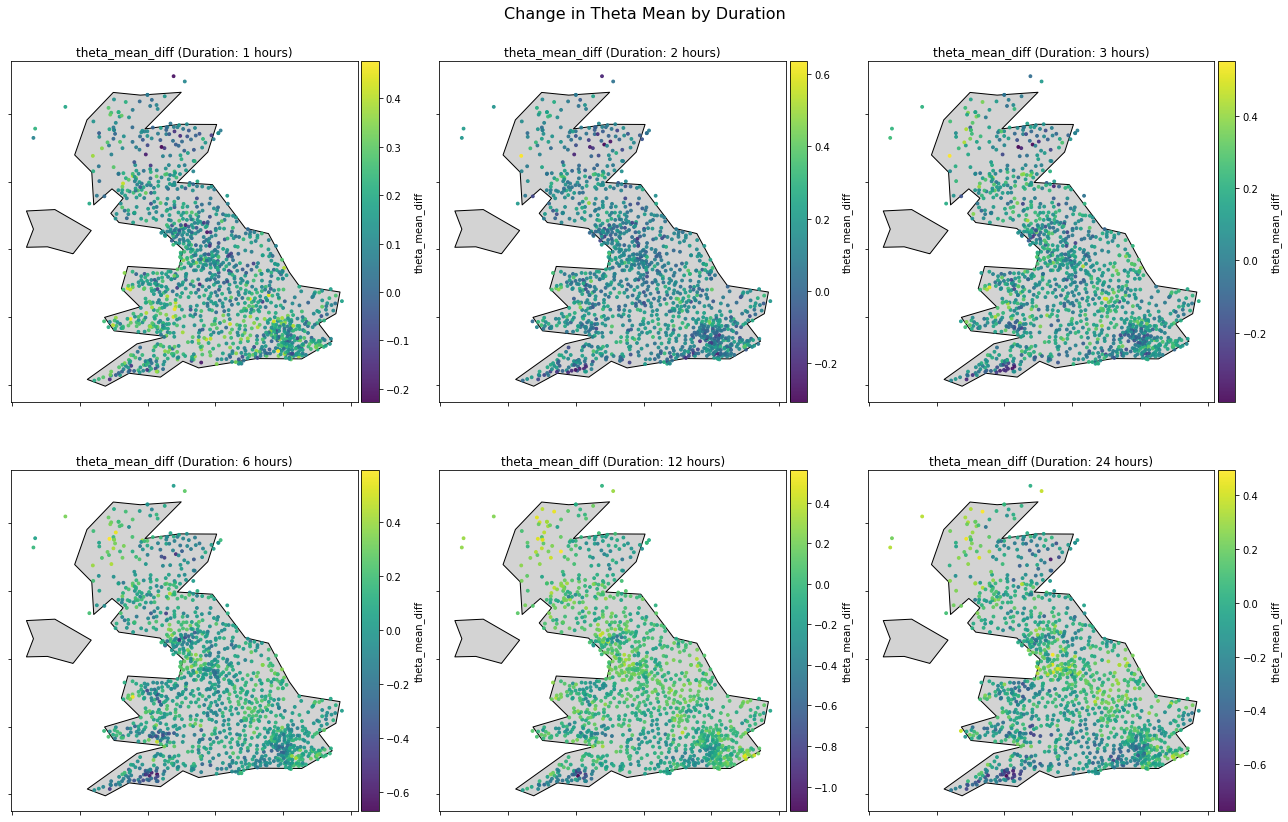

In [27]:
# Define the unique durations to iterate over
durations = df_changes_byduration['sampling_duration'].unique()
durations = ['1', '2', '3', '6', '12', '24']

### Plotting
fig_theta = plt.figure(figsize=(18, 12))
theta_axes = fig_theta.subplots(2, 3).flatten()  # Flatten the 2x4 grid into a 1D array

# Plot for each duration for theta
for i, duration in enumerate(durations):
    ax = theta_axes[i]  # Access the flattened array
    plot_change_variable_for_duration(ax, 'theta_mean_diff', duration, df_changes_byduration, tbo_vals)

# Adjust layout for theta figure
plt.suptitle('Change in Theta Mean by Duration', fontsize=16)
# plt.subplots_adjust(top=0.9)  # Adjust title position
plt.tight_layout()
plt.show()

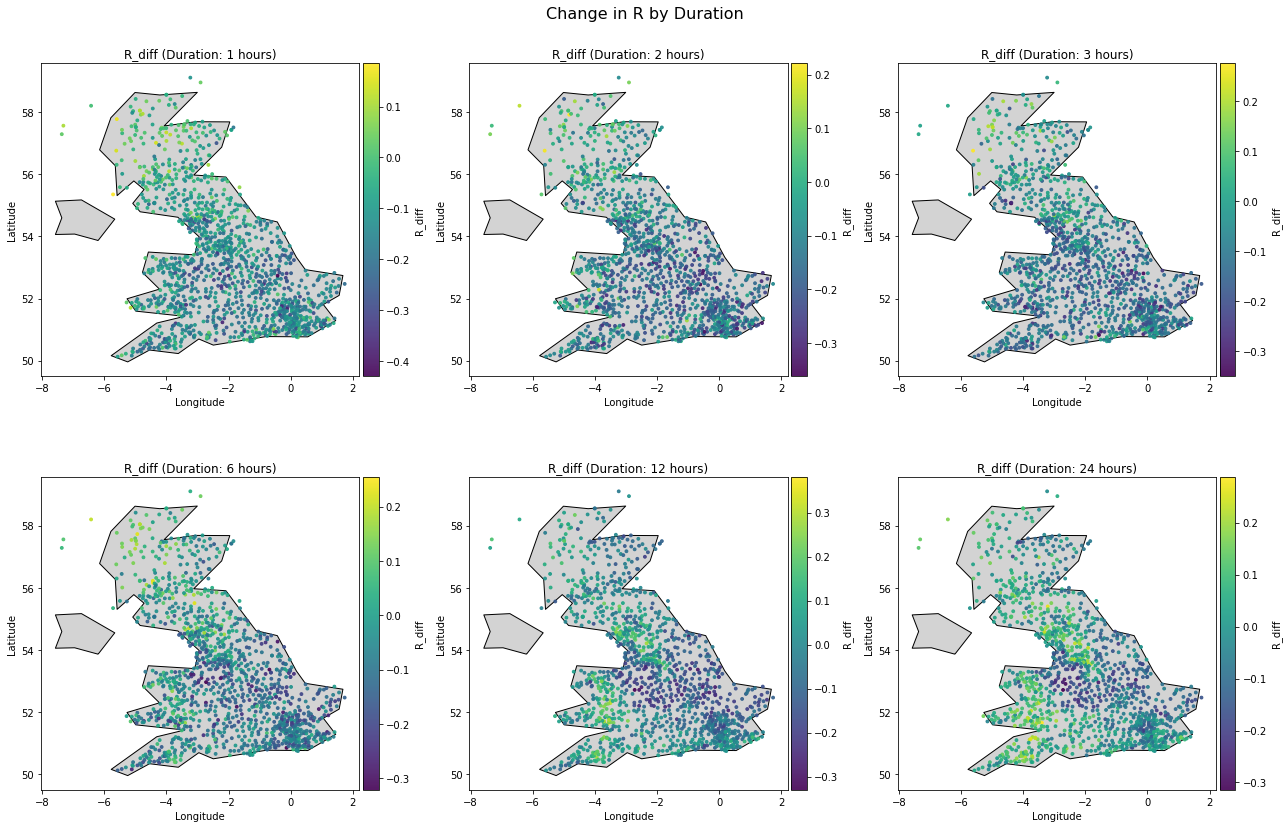

In [24]:
# Define the unique durations to iterate over
durations = df_changes['dur_for_which_this_is_amax'].unique()
durations = ['1', '2', '3', '6', '12', '24']

### Plotting
fig_theta = plt.figure(figsize=(18, 12))
theta_axes = fig_theta.subplots(2, 3).flatten()  # Flatten the 2x4 grid into a 1D array

# Plot for each duration for theta
for i, duration in enumerate(durations):
    ax = theta_axes[i]  # Access the flattened array
    plot_change_variable_for_duration(ax, 'R_diff', duration, df_changes, tbo_vals)

# Adjust layout for theta figure
plt.suptitle('Change in R by Duration', fontsize=16)
# plt.subplots_adjust(top=0.9)  # Adjust title position
plt.tight_layout()
plt.show()
